# One Component Plasma (OCP)

Oh the good ol' OCP. 
The YAML input file can be found at [input_file](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/OCP/input_files/coulomb_cgs.yaml) and this notebook at [notebook](https://raw.githubusercontent.com/murillo-group/sarkas/master/docs/examples/OCP/OCP.ipynb).

In [1]:
# Import the usual libraries
%pylab
%matplotlib inline

import os
plt.style.use('MSUstyle')

# Import sarkas
from sarkas.processes import Simulation, PostProcess, PreProcess


# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'coulomb_cgs.yaml')

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Simulation

The following code is commented out since the simulation has been run before. 
We leave it here so that it is easy to copy and paste in your notebook.

In [2]:
# sim = Simulation(input_file_name)
# sim.setup(read_yaml=True)
# sim.run()

## PostProcessing




* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *
                                 Postprocessing                                 
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

Job ID:  OCP_cgs
Job directory:  Simulations/OCP_cgs
PostProcessing directory: 
 Simulations/OCP_cgs/PostProcessing

Equilibration dumps directory:  Simulations/OCP_cgs/Simulation/Equilibration/dumps
Production dumps directory: 
 Simulations/OCP_cgs/Simulation/Production/dumps

Equilibration Thermodynamics file: 
 Simulations/OCP_cgs/Simulation/Equilibration/EquilibrationEnergy_OCP_cgs.csv
Production Thermodynamics file: 
 Simulations/OCP_cgs/Simulation/Production/ProductionEnergy_OCP_cgs.csv


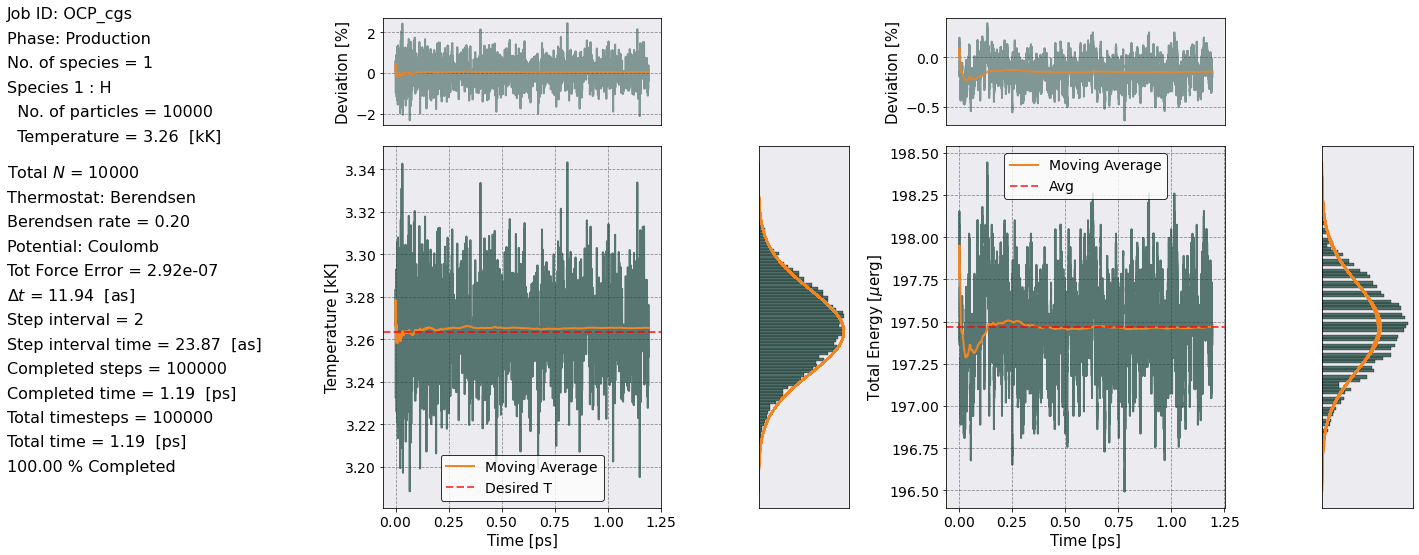

In [3]:
postproc = PostProcess(input_file_name)
postproc.setup(read_yaml=True)

postproc.therm.setup(postproc.parameters)
postproc.therm.temp_energy_plot(postproc)

## Radial Distribution Function

In [4]:
postproc.rdf.setup(postproc.parameters)
postproc.rdf.compute()


Radial Distribution Function Calculation Time: 0 sec 1 msec 101 usec 204 nsec


<AxesSubplot:xlabel='$r/a_{\\rm ws}$'>

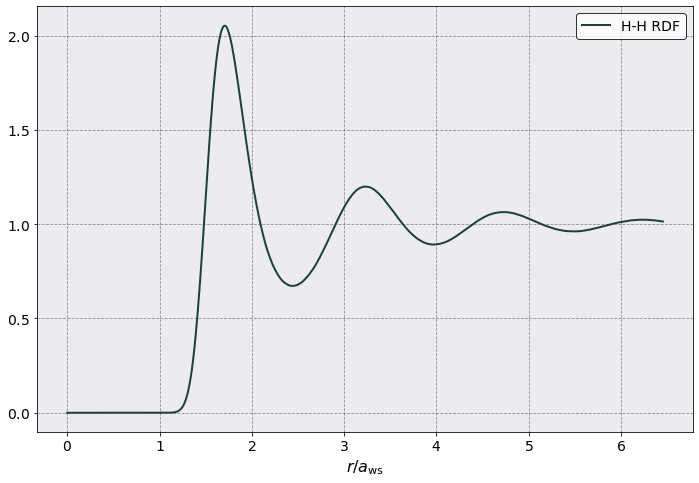

In [5]:
postproc.rdf.plot(scaling = postproc.rdf.a_ws, xlabel = r'$r/a_{\rm ws}$')

Calculate the Pressure from the RDF

In [19]:
rdf = np.copy(postproc.rdf.dataframe["H-H RDF"].to_numpy())
r = np.copy(postproc.rdf.dataframe["Distance"].to_numpy())
n_beta =  1.0 / ( postproc.parameters.total_num_density * postproc.therm.dataframe["Temperature"].mean() * postproc.parameters.kB)
pressure = postproc.therm.compute_pressure_from_rdf(r, rdf, 'Coulomb', postproc.potential.matrix)
print('The excess pressure is = {:.4f} / (n k_B T)'.format(pressure*n_beta))

The excess pressure is = -26.1939 / (n k_B T)


## Dynamic Structure Factor

In [56]:
from sarkas.tools.observables import DynamicStructureFactor

dsf = DynamicStructureFactor()
dsf.max_ka_value = 10
dsf.angle_averaging = 'principal_axis'
dsf.no_slices = 4
dsf.setup(postproc.parameters)
dsf.pretty_print()



====================== Dynamic Structure Factor ====================== 

k wavevector information saved in: 
 Simulations/OCP_cgs/PostProcessing/k_space_data/k_arrays.npz
n(k,t) data saved in: 
 Simulations/OCP_cgs/PostProcessing/k_space_data/nkt.h5
Data saved in: 
 Simulations/OCP_cgs/PostProcessing/DynamicStructureFactor/Production/DynamicStructureFactor_OCP_cgs.h5
Data accessible at: self.k_list, self.k_counts, self.ka_values, self.frequencies, self.dataframe

Frequency Space Parameters:
	No. of slices = 4
	No. dumps per slice = 12500
	Frequency step dw = 2 pi (no_slices * prod_dump_step)/(production_steps * dt)
	dw = 0.0126 w_p = 2.1057e+13 [Hz]
	Maximum Frequency w_max = 2 pi /(prod_dump_step * dt)
	w_max = 78.5487 w_p = 1.3161e+17 [Hz]


Wavevector parameters:
Smallest wavevector k_min = 2 pi / L = 3.9 / N^(1/3)
k_min = 0.1809 / a_ws = 3.4252e+07 [1/cm]

Angle averaging choice: principal_axis
	Maximum k harmonics = n_x, n_y, n_z = 55, 55, 55
	Largest wavector k_max = k_min * n_

In [58]:
dsf.parse()

In [59]:
import pandas as pd
pd.options.display.max_columns = 15
dsf.dataframe

H-H                                            \
                             Mean                                             
        Frequencies  ka1 = 0.1809  ka2 = 0.3618  ka3 = 0.5428  ka4 = 0.7237   
0     -1.316086e+17  2.299342e-25  2.601710e-25  1.506856e-25  2.238928e-25   
1     -1.315876e+17  2.299341e-25  2.601710e-25  1.506856e-25  2.238936e-25   
2     -1.315665e+17  2.299341e-25  2.601711e-25  1.506856e-25  2.238944e-25   
3     -1.315455e+17  2.299341e-25  2.601712e-25  1.506857e-25  2.238952e-25   
4     -1.315244e+17  2.299341e-25  2.601713e-25  1.506858e-25  2.238961e-25   
...             ...           ...           ...           ...           ...   
12495  1.315033e+17  2.299351e-25  2.601713e-25  1.506858e-25  2.238892e-25   
12496  1.315244e+17  2.299349e-25  2.601712e-25  1.506857e-25  2.238899e-25   
12497  1.315455e+17  2.299347e-25  2.601711e-25  1.506857e-25  2.238906e-25   
12498  1.315665e+17  2.299345e-25  2.601710e-25  1.506856e-25  2.238913e-25   
12499  1.315876e+17  2.299343e-25  2.601710e-25  1.506856e-25  2.238920e-25   

                                   ...                              \
                                   ...           Std                 
       ka5 = 0.9046  ka6 = 1.0855  ... ka49 = 8.8650 ka50 = 9.0459   
0      1.023652e-24  1.302044e-24  ...  2.218304e-22  1.318253e-22   
1      1.023652e-24  1.302044e-24  ...  2.218302e-22  1.318247e-22   
2      1.023651e-24  1.302043e-24  ...  2.218301e-22  1.318241e-22   
3      1.023651e-24  1.302043e-24  ...  2.218300e-22  1.318235e-22   
4      1.023650e-24  1.302043e-24  ...  2.218299e-22  1.318229e-22   
...             ...           ...  ...           ...           ...   
12495  1.023657e-24  1.302050e-24  ...  2.218317e-22  1.318285e-22   
12496  1.023656e-24  1.302048e-24  ...  2.218314e-22  1.318278e-22   
12497  1.023655e-24  1.302047e-24  ...  2.218311e-22  1.318272e-22   
12498  1.023654e-24  1.302046e-24  ...  2.218308e-22  1.318265e-22   
12499  1.023653e-24  1.302045e-24  ...  2.218306e-22  1.318259e-22   

                                                                             
                                                                             
      ka51 = 9.2269 ka52 = 9.4078 ka53 = 9.5887 ka54 = 9.7696 ka55 = 9.9505  
0      1.722560e-22  2.186809e-22  1.828332e-22  4.173647e-22  1.830595e-22  
1      1.722552e-22  2.186806e-22  1.828334e-22  4.173652e-22  1.830587e-22  
2      1.722544e-22  2.186804e-22  1.828335e-22  4.173658e-22  1.830580e-22  
3      1.722536e-22  2.186801e-22  1.828337e-22  4.173664e-22  1.830573e-22  
4      1.722529e-22  2.186799e-22  1.828339e-22  4.173671e-22  1.830566e-22  
...             ...           ...           ...           ...           ...  
12495  1.722603e-22  2.186826e-22  1.828328e-22  4.173628e-22  1.830636e-22  
12496  1.722594e-22  2.186822e-22  1.828329e-22  4.173631e-22  1.830627e-22  
12497  1.722585e-22  2.186819e-22  1.828329e-22  4.173634e-22  1.830619e-22  
12498  1.722576e-22  2.186815e-22  1.828330e-22  4.173638e-22  1.830610e-22  
12499  1.722568e-22  2.186812e-22  1.828331e-22  4.173642e-22  1.830603e-22  

[12500 rows x 111 columns]

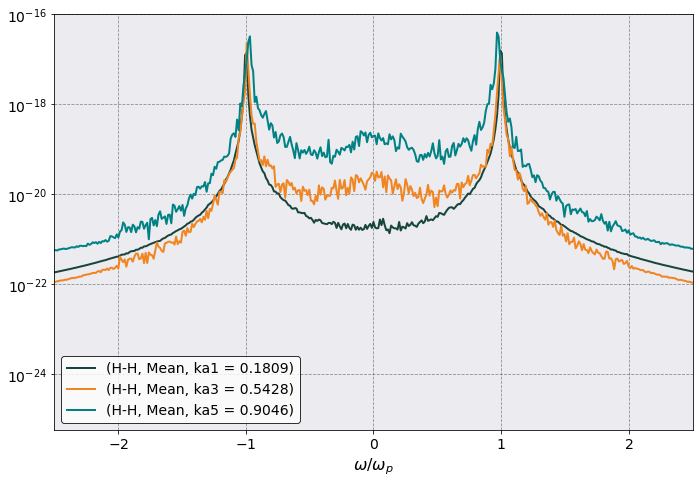

In [60]:
ax = dsf.plot(scaling = dsf.total_plasma_frequency, 
         y = [("H-H","Mean", "ka1 = 0.1809"), ("H-H","Mean", "ka3 = 0.5428"), ("H-H","Mean", "ka5 = 0.9046")],
         xlabel = r'$\omega/\omega_p$',
         xlim = (-2.5, 2.5),
        logy = True)
ax.legend()

### Collective Mode Dispersion

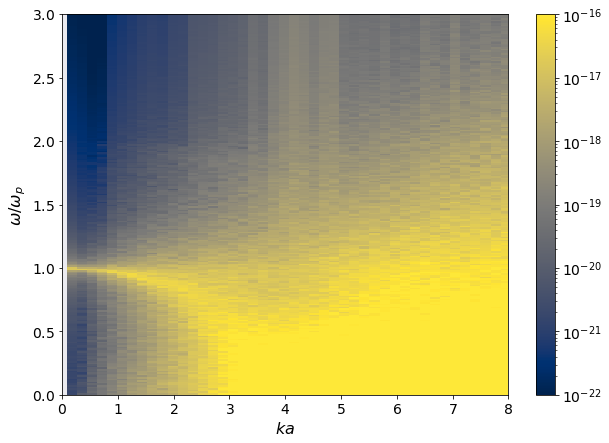

In [61]:
w = dsf.dataframe[(" "," ","Frequencies")]/ dsf.total_plasma_frequency

ka_mesh, w_mesh = np.meshgrid(dsf.ka_values, w)

Skw = dsf.dataframe[("H-H", "Mean")]
fig, ax = plt.subplots(1,1)
pc = ax.pcolormesh(ka_mesh, w_mesh, Skw,
                   shading = 'auto',
                   norm = mpl.colors.LogNorm(vmin = 1e-22, vmax = 1e-16),
                   cmap='cividis')
ax.set(ylim = (0,3),
       xlim = (0,8),
       xlabel = r'$ka$', 
       ylabel = r'$\omega/\omega_p$')
plt.colorbar(pc)

## Transport Coefficients


### Diffusion



======================= Diffusion Coefficient ======================== 


Calculating vacf for slice 1/4.


Read in data:   0%|          | 0/12500 [00:00<?, ?it/s]


Calculating vacf for slice 2/4.


Read in data:   0%|          | 0/12500 [00:00<?, ?it/s]


Calculating vacf for slice 3/4.


Read in data:   0%|          | 0/12500 [00:00<?, ?it/s]


Calculating vacf for slice 4/4.


Read in data:   0%|          | 0/12500 [00:00<?, ?it/s]


VACF Calculation Time: 0 hrs 5 min 30 sec
Data saved in: 
 Simulations/OCP_cgs/PostProcessing/VelocityAutoCorrelationFunction/Production/Diffusion_OCP_cgs.h5

No. of slices = 4
No. dumps per slice = 6250
Time interval of autocorrelation function = 1.4919e-13 [s] ~ 249 w_p T


  0%|          | 0/4 [00:00<?, ?it/s]

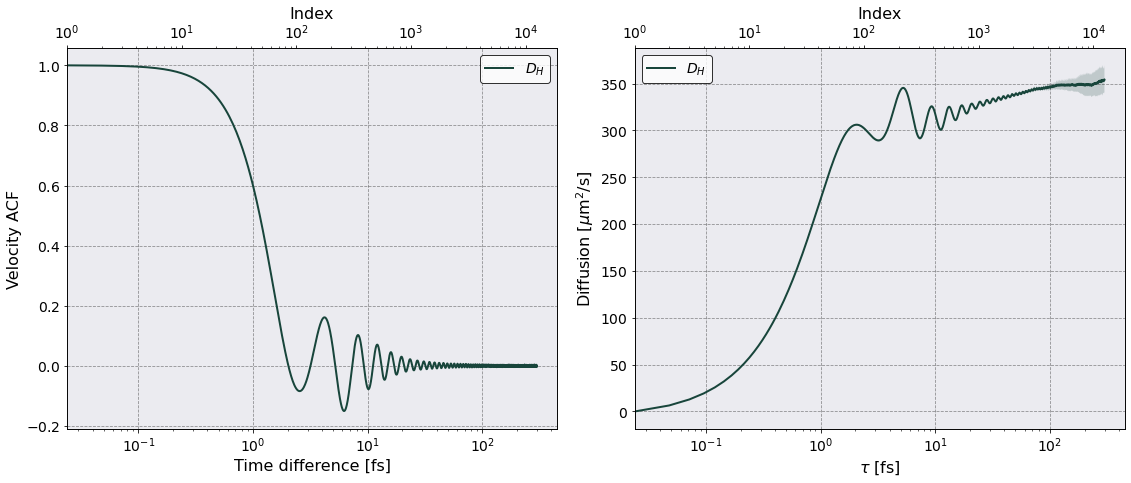

In [20]:
from sarkas.tools.transport import TransportCoefficient

diffusion = TransportCoefficient.diffusion(postproc.parameters, no_slices = 4)



======================= Viscosity Coefficient ======================== 


Calculating pressure tensor and its acf for slice 1/3.


Calculating Pressure:   0%|          | 0/16667 [00:00<?, ?it/s]


Calculating pressure tensor and its acf for slice 2/3.


Calculating Pressure:   0%|          | 0/16667 [00:00<?, ?it/s]


Calculating pressure tensor and its acf for slice 3/3.


Calculating Pressure:   0%|          | 0/16667 [00:00<?, ?it/s]


Pressure Tensor and its ACF Calculation Time: 0 hrs 4 min 3 sec
Data saved in: 
 Simulations/OCP_cgs/PostProcessing/PressureTensor/Production/Viscosities_OCP_cgs.h5

No. of slices = 3
No. dumps per slice = 8333
Time interval of autocorrelation function = 1.9893e-13 [s] ~ 333 w_p T


  0%|          | 0/3 [00:00<?, ?it/s]

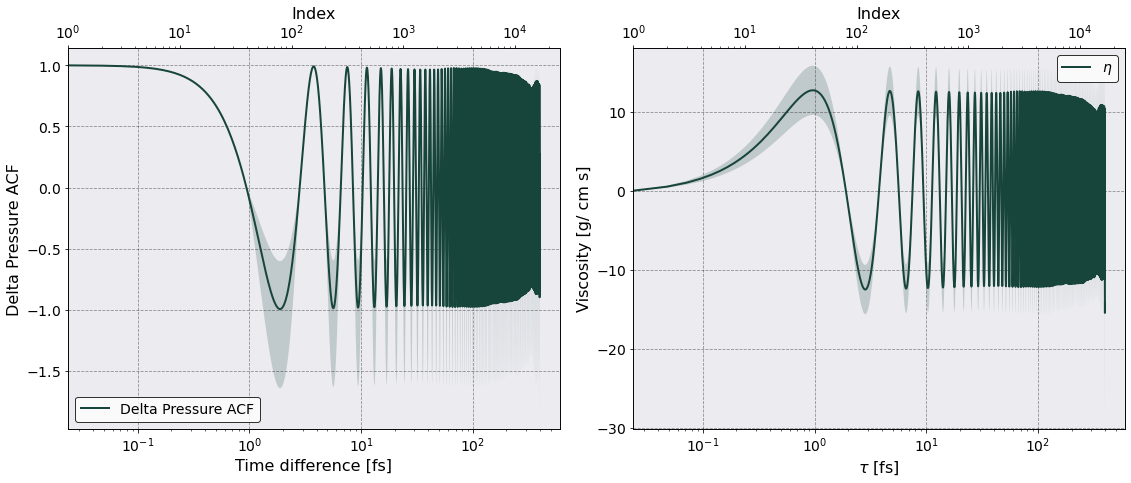

In [32]:
eta = TransportCoefficient.viscosity(postproc.parameters, 
                                     compute_acf=True,
                                     no_slices = 3)
#                                     plot_quantities=['Shear Viscosity Tensor xy'])

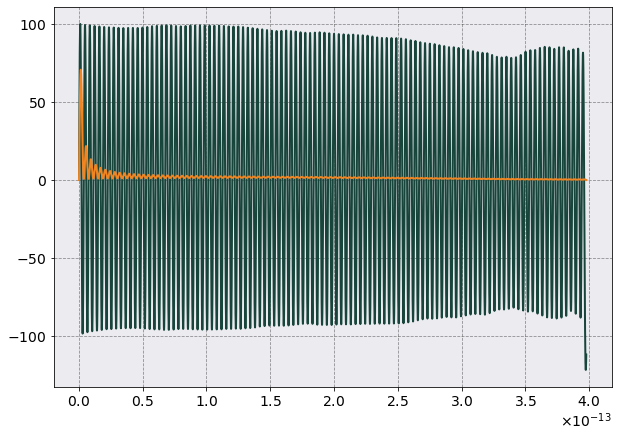

In [33]:
norms = postproc.parameters.species_masses[0]*postproc.parameters.total_num_density*postproc.parameters.total_plasma_frequency*postproc.parameters.a_ws**2
plt.plot(eta['Time'], 
         eta[('Bulk Viscosity', 'Mean')]/norms)

plt.plot(eta['Time'], 
         eta[('Bulk Viscosity', 'Mean')].expanding().mean()/norms)

# plt.ylim(0,1)

In [34]:
delta_Ek = np.copy(postproc.therm.dataframe["Total Kinetic Energy"].to_numpy() ) - postproc.therm.dataframe["Total Kinetic Energy"].mean() 
delta_Ek0 = delta_Ek[0]*np.ones( len(delta_Ek))
beta = 1.0 /(postproc.therm.dataframe["Temperature"].mean() * postproc.parameters.kB )

In [39]:
from sarkas.tools.observables import correlationfunction

xi_integrand = beta/(9 * postproc.parameters.box_volume)*correlationfunction(delta_Ek, delta_Ek0)

In [40]:
xi = np.zeros(len(xi_integrand))
for it in range(1, len(xi_integrand)):
    xi[it] = np.trapz(xi_integrand[:it], x = postproc.therm.dataframe["Time"].iloc[:it])

In [41]:
xi /= (postproc.parameters.species_masses[0] * postproc.parameters.total_plasma_frequency * postproc.parameters.total_num_density * postproc.parameters.a_ws**2 )


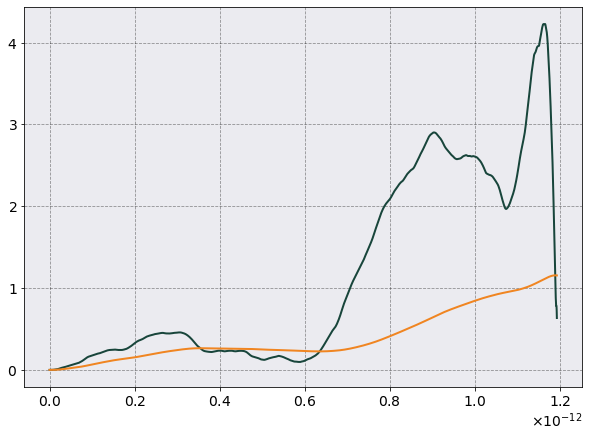

In [42]:
import pandas as pd

plt.plot(postproc.therm.dataframe["Time"], 1e4 * xi)
plt.plot(postproc.therm.dataframe["Time"], 1e4 * pd.Series(xi).expanding().mean() )

In [44]:
1e4 * pd.Series(xi).expanding().mean()

0        0.000000e+00
1        0.000000e+00
2       -1.776175e-09
3       -8.268144e-09
4       -2.262274e-08
             ...     
49996    1.154291e+00
49997    1.154281e+00
49998    1.154271e+00
49999    1.154260e+00
50000    1.154250e+00
Length: 50001, dtype: float64

In [45]:
postproc.parameters.coupling_constant

96.9346104419713

In [49]:
xi_integrand[0]*1e3

5.809344824234305

In [50]:
from sarkas.tools.observables import PressureTensor

pt = PressureTensor()
pt.setup(postproc.parameters, no_slice = 3)
pt.parse()


In [51]:
pt.dataframe

Time      Pressure  Pressure ACF Delta Pressure  \
                NaN       slice 0       slice 0        slice 0   
0      0.000000e+00  1.193165e+12  2.035789e+24   4.543517e+11   
1      2.387072e-17  1.143159e+12  2.034595e+24   4.043458e+11   
2      4.774144e-17  1.095720e+12  2.031032e+24   3.569062e+11   
3      7.161216e-17  1.044534e+12  2.025109e+24   3.057204e+11   
4      9.548288e-17  9.891764e+11  2.016832e+24   2.503630e+11   
...             ...           ...           ...            ...   
16662  3.977339e-13  1.354013e+12  1.312561e+24   6.151994e+11   
16663  3.977578e-13  1.269146e+12  1.295460e+24   5.303321e+11   
16664  3.977817e-13  1.179770e+12  1.277714e+24   4.409568e+11   
16665  3.978055e-13  1.123334e+12  1.265534e+24   3.845204e+11   
16666  3.978294e-13  1.041626e+12  1.242832e+24   3.028128e+11   

      Delta Pressure ACF Pressure Tensor xx Pressure Tensor ACF xx  \
                 slice 0            slice 0                slice 0   
0           1.489944e+24       4.197758e+12           4.065297e+25   
1           1.488783e+24       3.846116e+12           4.062202e+25   
2           1.485255e+24       3.488941e+12           4.052714e+25   
3           1.479367e+24       3.126807e+12           4.036849e+25   
4           1.471128e+24       2.751863e+12           4.014633e+25   
...                  ...                ...                    ...   
16662       1.689407e+23       5.757436e+12           1.850815e+25   
16663       1.622675e+23       5.494001e+12           1.894943e+25   
16664       1.546348e+23       5.254212e+12           1.937113e+25   
16665       1.485743e+23       5.044482e+12           1.976822e+25   
16666       1.375835e+23       4.773888e+12           2.003963e+25   

      Pressure Tensor xy Pressure Tensor ACF xy Pressure Tensor xz  ...  \
                 slice 0                slice 0            slice 0  ...   
0          -1.507802e+11           3.216683e+22      -1.327086e+11  ...   
1          -1.500560e+11           3.198075e+22      -1.293498e+11  ...   
2          -1.490751e+11           3.176857e+22      -1.258428e+11  ...   
3          -1.478397e+11           3.153141e+22      -1.221877e+11  ...   
4          -1.276976e+11           3.126784e+22      -9.540580e+10  ...   
...                  ...                    ...                ...  ...   
16662      -1.597929e+10           8.882462e+21      -1.222033e+11  ...   
16663      -5.016017e+10           1.107790e+22      -1.395378e+11  ...   
16664      -4.168322e+10           1.233558e+22      -1.594872e+11  ...   
16665      -1.008177e+11           1.544868e+22      -1.720422e+11  ...   
16666      -1.046013e+11           1.577180e+22      -1.712508e+11  ...   

      Pressure Tensor ACF zx               Pressure Tensor zy                \
                        Mean           Std               Mean           Std   
0               3.915351e+22  1.328193e+21      -4.316062e+10  3.567463e+11   
1               3.897106e+22  1.330773e+21      -2.528783e+10  3.261061e+11   
2               3.875736e+22  1.333216e+21      -2.396285e+10  3.165574e+11   
3               3.851073e+22  1.333676e+21      -2.979278e+10  3.126721e+11   
4               3.823164e+22  1.332573e+21      -3.001443e+10  3.066016e+11   
...                      ...           ...                ...           ...   
16662          -1.233831e+21  3.388423e+21      -3.938973e+10  3.233788e+11   
16663          -1.474326e+21  3.935587e+21      -3.977939e+10  3.233022e+11   
16664          -1.847356e+21  4.583006e+21      -4.415803e+10  3.305447e+11   
16665          -1.745410e+21  4.839468e+21      -4.669070e+10  3.338299e+11   
16666          -1.817814e+21  4.557872e+21      -4.769341e+10  3.476702e+11   

      Pressure Tensor ACF zy               Pressure Tensor zz                \
                        Mean           Std               Mean           Std   
0               3.577555e+22  6.811786e+20       6.994166e+11  1.042380e+12   
1   

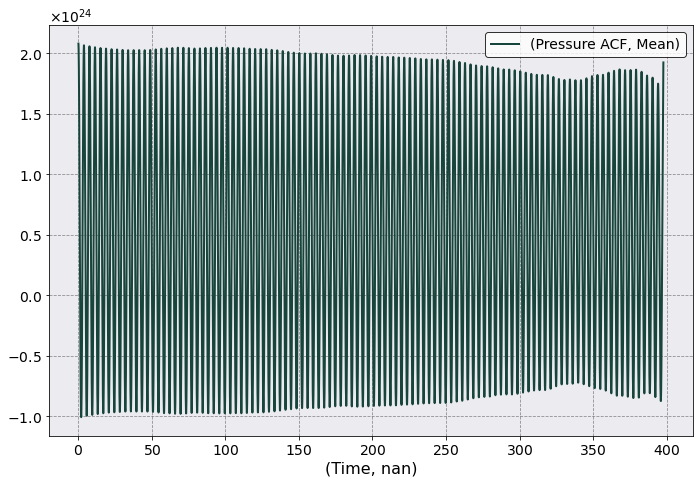

In [54]:
ax = pt.plot(scaling = 1e-15, y = [('Pressure ACF', 'Mean')])
ax.legend()

In [55]:
postproc.io.dump_xyz()

  0%|          | 0/50001 [00:00<?, ?it/s]

KeyboardInterrupt: 